In [1]:

from matplotlib import pyplot as plt
import networkx as nx

%matplotlib inline

In [2]:


# create a networkx graph object
G = nx.Graph() 

# Graph() is a collection of nodes(vertices) along with identified pairs of nodes (called edges)
# in NetworkX, nodes can be any hashable object.
# such as: a text string, an image, an XML object.
# Python's None object should not be used as a node.

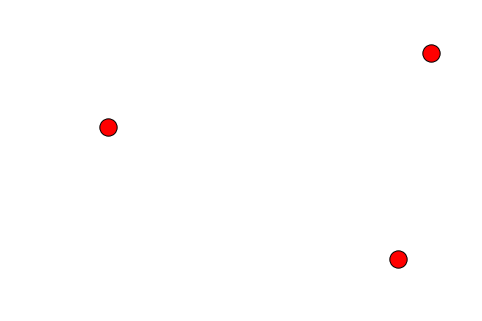

In [3]:
# feed G to grow.
G.add_node(1)
G.add_nodes_from([2,3])
nx.draw(G)

In [8]:
# any nbunch of nodes.
# an nbunch is any iterable container of nodes that is not itself of node in the graph.

H = nx.path_graph(4)

H.nodes()


[0, 1, 2, 3]

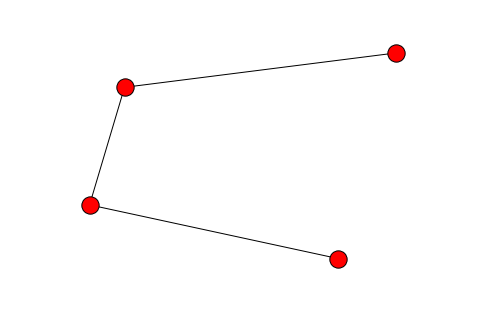

In [7]:
nx.draw(H)

[1, 2, 3, <networkx.classes.graph.Graph at 0x110e97eb8>]

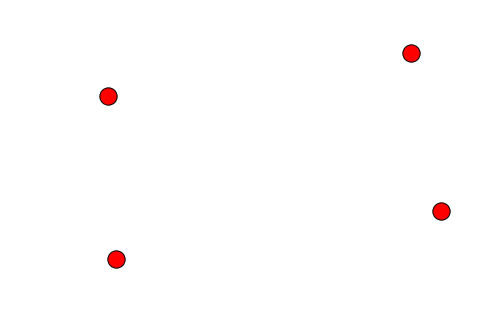

In [10]:
# you can also use H as a node in G.
G.add_node(H)

# in this way, H is a node of Graph G.
nx.draw(G)
G.nodes()

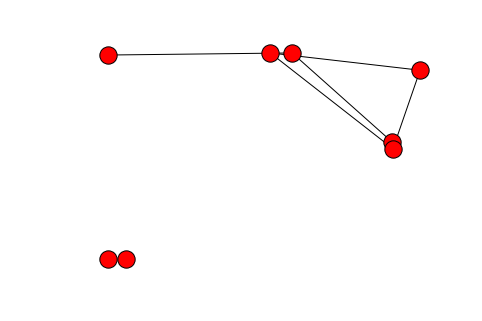

In [11]:
# G can also be grown by adding one edge at a time

G.add_edge(1,2)

e = (2, 3)

G.add_edge(*e)

# by adding a list of edges
G.add_edges_from([(1,2), (1,3)])
nx.draw(G)

In [12]:
G = nx.Graph()

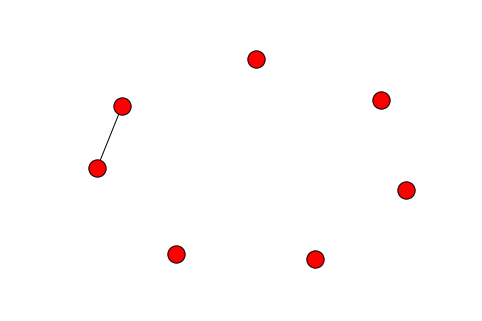

In [13]:
G.add_node(1)
G.add_edge(1,2)

# adds node "spam"
G.add_node("spam")

# adds 4 nodes: 's', 'p', 'a', 'm'
G.add_nodes_from("spam")
nx.draw(G)

In [14]:
G.number_of_nodes()

7

In [15]:
G.number_of_edges()

1

In [16]:
# you will get a list of objects.
G.nodes()

[1, 2, 'p', 's', 'spam', 'm', 'a']

In [17]:
G.edges()

[(1, 2)]

In [18]:
G.neighbors(1)

[2]

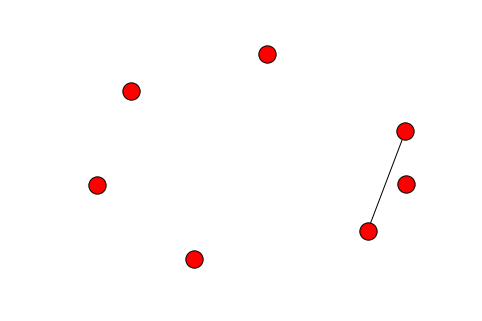

In [19]:
# the nodes' positions are randomly distributed.
nx.draw(G)

### Adding attributes to graphs, nodes and edges

1. Graph Attributes

2. Node Attributes

3. Edge Attributes


In [23]:
G = nx.Graph(name = "First Graph")

In [24]:
G.graph

{'name': 'First Graph'}

In [26]:
G.add_node(1, time = '5pm')
G.add_nodes_from([3, 5], time = '2pm')
G.node[1]

{'time': '5pm'}

In [27]:
G.nodes(data = True)

[(1, {'time': '5pm'}), (3, {'time': '2pm'}), (5, {'time': '2pm'})]

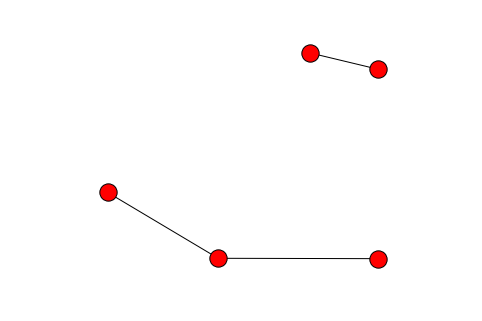

In [29]:
G.add_edge(1,2, weight= 10)
G.add_edges_from([(3,4), (4, 5)], color = 'red')
nx.draw(G)

### Example with edges' weights

In [30]:
G = nx.Graph()

G.add_edge('a', 'b', weight = 0.6)
G.add_edge('a', 'c', weight = 0.2)
G.add_edge('c', 'd', weight = 0.1)
G.add_edge('c', 'e', weight = 0.7)
G.add_edge('c', 'f', weight = 0.9)
G.add_edge('a', 'd', weight = 0.3)

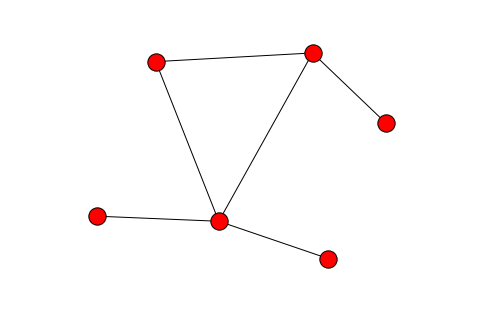

In [31]:
nx.draw(G)

In [34]:
elarge = [(u, v) for (u,v,d) in G.edges(data = True) if d['weight'] > 0.5]
esmall = [(u, v) for (u,v,d) in G.edges(data = True) if d['weight'] <=0.5]

In [35]:
pos = nx.spring_layout(G)

In [36]:
pos

{'a': array([ 0.93372967,  0.20571272]),
 'b': array([ 1.        ,  0.55886489]),
 'c': array([ 0.0759307 ,  0.36697779]),
 'd': array([ 0.72687181,  0.95097913]),
 'e': array([ 0.20751994,  0.        ]),
 'f': array([ 0.        ,  0.74767731])}

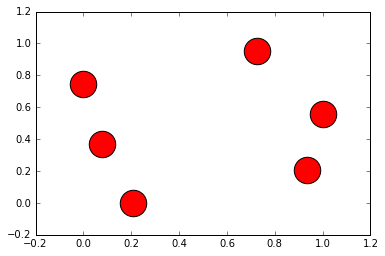

In [37]:
nx.draw_networkx_nodes(G,pos,node_size=700)


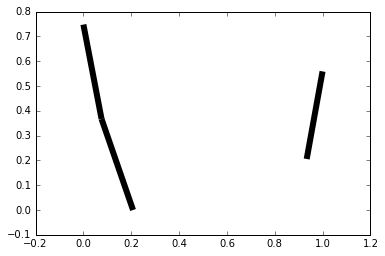

In [38]:
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=6)

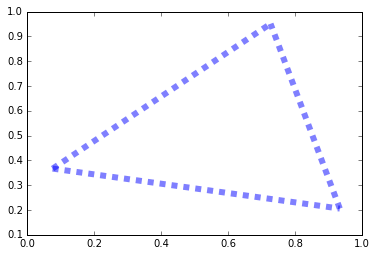

In [39]:
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=6,alpha=0.5,edge_color='b',style='dashed')

{'a': <matplotlib.text.Text at 0x1117b3390>,
 'b': <matplotlib.text.Text at 0x11192e5f8>,
 'c': <matplotlib.text.Text at 0x1117b3a20>,
 'd': <matplotlib.text.Text at 0x1116e3ac8>,
 'e': <matplotlib.text.Text at 0x1117b3ba8>,
 'f': <matplotlib.text.Text at 0x1116e3f28>}

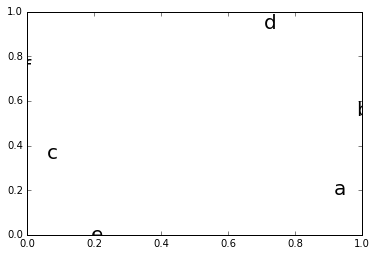

In [40]:
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

(0.0, 1.0, 0.0, 1.0)

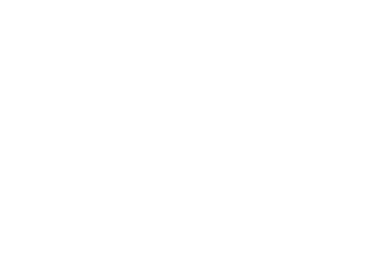

In [41]:
plt.axis('off')

(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.2000000000000002)

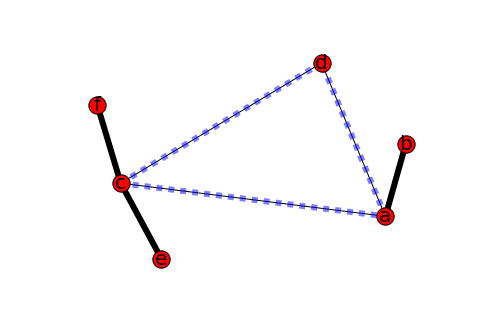

In [45]:
nx.draw(G, pos, node_sixe = 700)
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=6,alpha=0.5,edge_color='b',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
plt.axis('off')

(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.2000000000000002)

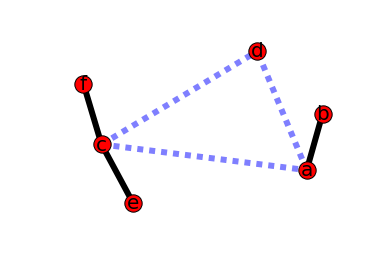

In [46]:
nx.draw_networkx_nodes(G, pos, node_sixe = 700)
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=6,alpha=0.5,edge_color='b',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
plt.axis('off')

### Eigenvalues

In [47]:
import numpy.linalg

In [54]:
n = 10
m = 100
G = nx.gnm_random_graph(n,m)

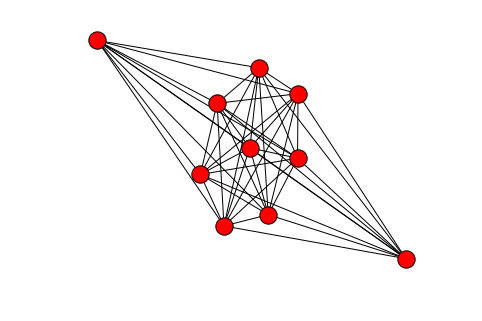

In [55]:
nx.draw(G)

In [57]:
L = nx.normalized_laplacian_matrix(G)
L

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [58]:
L.A

array([[ 1.        , -0.11111111, -0.11111111, -0.11111111, -0.11111111,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111,  1.        , -0.11111111, -0.11111111, -0.11111111,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111,  1.        , -0.11111111, -0.11111111,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111,  1.        , -0.11111111,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111, -0.11111111,  1.        ,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111,
         1.        , -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111,
        -0.11111111,  1.        , -0.11111111

In [61]:
e = numpy.linalg.eigvals(L.A)

In [62]:
max(e)

1.1111111111111118

In [63]:
min(e)

-4.163336342344337e-17

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]),
 array([ -4.16333634e-17,   1.11111111e-02,   2.22222222e-02,
          3.33333333e-02,   4.44444444e-02,   5.55555556e-02,
          6.66666667e-02,   7.77777778e-02,   8.88888889e-02,
          1.00000000e-01,   1.11111111e-01,   1.22222222e-01,
          1.33333333e-01,   1.44444444e-01,   1.55555556e-01,
          1.66666667e-01,   1.77777778e-01,   1.88888889e-01,
          2.00000000e-01,   2.11111111e-01,   2.22222222e-01,


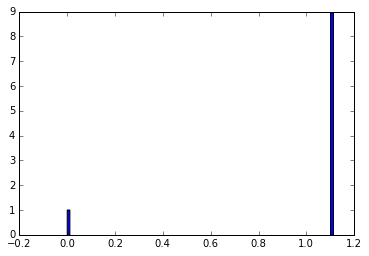

In [64]:
plt.hist(e, bins = 100)

(0, 2)

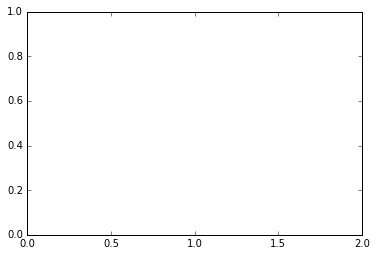

In [65]:
plt.xlim(0,2)